In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('data_analysis.csv')

C:\Users\SUJIT JADHAV\AppData\Local\Temp\ipykernel_22740\1080066900.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_analysis.csv')


In [4]:
print(df)

                        id      conversation_id               created_at  \
0      1406397735792791556  1406397735792791556  2021-06-20 05:15:24 IST   
1      1406057066058313733  1406057066058313733  2021-06-19 06:41:42 IST   
2      1405965100993986561  1405965100993986561  2021-06-19 00:36:16 IST   
3      1405935463374991366  1405935461042958338  2021-06-18 22:38:30 IST   
4      1405918849329991694  1405918849329991694  2021-06-18 21:32:29 IST   
...                    ...                  ...                      ...   
39111           7443517384           7443517384  2010-01-06 20:45:45 IST   
39112           7426790266           7426790266  2010-01-06 08:40:39 IST   
39113           7416161173           7416161173  2010-01-06 03:04:30 IST   
39114           7285952223           7285952223  2010-01-02 07:31:05 IST   
39115           7274159499           7274159499  2010-01-01 23:11:04 IST   

             date      time  timezone     user_id      username  \
0      2021-06-20  0

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
pip install  wordcloud 

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 744.7 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 871.5 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
from wordcloud import WordCloud

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39116 non-null  int64  
 1   conversation_id  39116 non-null  int64  
 2   created_at       39116 non-null  object 
 3   date             39116 non-null  object 
 4   time             39116 non-null  object 
 5   timezone         39116 non-null  int64  
 6   user_id          39116 non-null  int64  
 7   username         39116 non-null  object 
 8   name             39116 non-null  object 
 9   place            92 non-null     object 
 10  tweet            39116 non-null  object 
 11  language         39116 non-null  object 
 12  mentions         39116 non-null  object 
 13  urls             39116 non-null  object 
 14  photos           39116 non-null  object 
 15  replies_count    39116 non-null  int64  
 16  retweets_count   39116 non-null  int64  
 17  likes_count 

In [11]:
df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              39024
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          37494
video                  0
thumbnail          27974
near               39116
geo                39116
source             39116
user_rt_id         39116
user_rt            39116
retweet_id         39116
reply_to               0
retweet_date       39116
translate          39116
trans_src          39116
trans_dest         39116
dtype: int64

In [12]:
df.drop(['place','quote_url','thumbnail','near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest'],axis=1,inplace=True)

In [13]:
df.isnull().sum()

id                 0
conversation_id    0
created_at         0
date               0
time               0
timezone           0
user_id            0
username           0
name               0
tweet              0
language           0
mentions           0
urls               0
photos             0
replies_count      0
retweets_count     0
likes_count        0
hashtags           0
cashtags           0
link               0
retweet            0
video              0
reply_to           0
dtype: int64

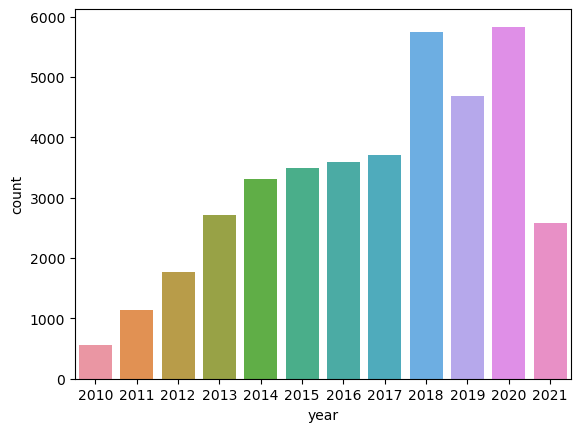

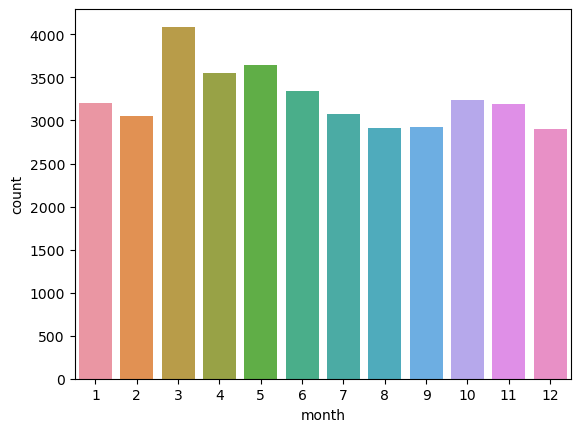

In [15]:
df['year'] = pd.DatetimeIndex(df['date']).year
sns.countplot(x ='year', data = df) 
plt.show()
df['month'] = pd.DatetimeIndex(df['date']).month
sns.countplot(x ='month', data = df) 
plt.show()

In [16]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = stopwords.words()

[nltk_data] Downloading package punkt to C:\Users\SUJIT
[nltk_data]     JADHAV\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\SUJIT
[nltk_data]     JADHAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"rt":"",
"RT":"",
"http":"",
"https":""
}

def lookup_dict(text, dictionary):
    for word in str(text).split():
        if word.lower() in dictionary:
            if word.lower() in str(text).split():
                text = text.replace(word, dictionary[word.lower()])
    return text

df['tweet'] = df['tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))

In [18]:
# Creating token for the clean tweets
df['tweet'] =df['tweet'].apply(lambda x: word_tokenize(str(x)))

#remove stop words
stop_words = set(stopwords.words('english'))
# Created new columns of tokens - where stop words are being removed
df['tweet'] = df['tweet'].apply(lambda x: [word for word in x if not word in stop_words])
## Tokens columns with stop words and without stop words

In [19]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = str(text)
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     

    # removing the emojies               # https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   
    
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text

dt = df['tweet'].apply(cleaning)

In [21]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -------- ------------------------------- 133.1/626.3 kB 2.6 MB/s eta 0:00:01
   ---------------- ----------------------- 256.0/626.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------- ----- 542.7/626.3 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
#calculating sentiments
from textblob import TextBlob
def GetTextSubjectivity(txt):
    txt=str(txt)
    return TextBlob(txt).sentiment.subjectivity

def GetTextPolarity(txt):
    txt=str(txt)
    return TextBlob(txt).sentiment.polarity

df['Subjectivity'] = df['tweet'].apply(GetTextSubjectivity)
df['Polarity'] = df['tweet'].apply(GetTextPolarity)

def GetTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
    
df["Score"]=df['Polarity'].apply(GetTextAnalysis)

In [23]:
positive=df[df['Score']=='Positive']
print (str(round(positive.shape[0]/(df.shape[0])*100)) + "% Positive tweets")
pos = positive.shape[0]/(df.shape[0])*100

negative=df[df['Score']=='Negative']
print (str(round(negative.shape[0]/(df.shape[0])*100)) + "% Negative tweets")
neg = negative.shape[0]/df.shape[0]*100

neutral=df[df['Score']=='Neutral']
print (str(round((neutral.shape[0])/(df.shape[0])*100)) + "% neutral tweets")
neu = neutral.shape[0]/df.shape[0]*100

47% Positive tweets
12% Negative tweets
40% neutral tweets


(-1.1002061429726202,
 1.1043380483180723,
 -1.1024832115292633,
 1.1523187390536995)

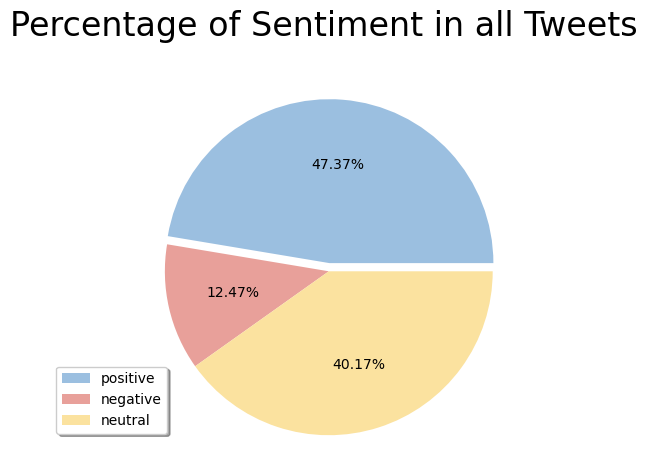

In [24]:
#viewing % posi , neg , neu tweets
explode=(0.05,0,0)
labels = 'positive','negative','neutral'
sizes = [pos,neg,neu]
colours=['#9BBFE0','#E8A09A','#FBE29F']
plt.pie(sizes,explode=explode,colors=colours,autopct='%.2f%%',startangle=0)
plt.title('Percentage of Sentiment in all Tweets \n', fontsize=24)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')